In [1]:
import re
import os
import shutil
import pandas as pd
from time import sleep
import io
import matplotlib.pyplot as plt
from datetime import date, timedelta
'''Ler PDO_Sumoper'''
'''Encontrar uma pasta dentro de um diretório e extrair os dados'''
for diretorio, subpastas, arquivos in os.walk(os.path.dirname(os.path.abspath('__file__'))):
    for arquivo in arquivos:
        # print(arquivos)
        if arquivo.startswith('PDO_SUMAOPER.DAT'):
            print(os.path.join(diretorio, arquivo))
            file=os.path.join(diretorio, arquivo)

''' Abrir arquivo em modo leitura'''
with open(file, "r") as f:
    # Ler linhas específicas do arquivo
    linhas = f.readlines()[363:530]
'''Geraçaõ hidroeletrica Bloco 3 -Dessem - PDOSumaope'''
[vt, usina, prod, energia, vz_t, gh]=list(),list(),list(), list(), list(), list()
for i in range(1,165):
    vt.append(linhas[i+2][66:72])
    usina.append(linhas[i+2][5:18])
    prod.append(linhas[i+2][77:81])
    vz_t.append(linhas[i+2][25:33])
    gh.append(linhas[i + 2][34:43])
    i+=1
lista_de_tuplas = list(zip(usina, vt, prod, vz_t, gh))
df = pd.DataFrame(lista_de_tuplas, columns=['Usina', 'Vazão Não-Turbinada', 'prod', 'Vazão Turbinada', 'Geração Hidráulica'])
df['Vazão Não-Turbinada']=df['Vazão Não-Turbinada'].replace("  -   ", 0.00)
df['Vazão Não-Turbinada']=pd.to_numeric(df['Vazão Não-Turbinada'])
df['Vazão Turbinada']=df['Vazão Turbinada'].replace("   -    ", 0.00)
df['Vazão Turbinada']=pd.to_numeric(df['Vazão Turbinada'])
df['Geração Hidráulica']=df['Geração Hidráulica'].replace("    -    ", 0.00)
df['Geração Hidráulica']=pd.to_numeric(df['Geração Hidráulica'])
df['prod']=df['prod'].replace( ' -  ', 0.00)
df['prod']=pd.to_numeric(df['prod'])
df['ENERGIA VERTIDA']=df['Vazão Não-Turbinada']*df['prod']
df['ENERGIA_ACUM'] = df['ENERGIA VERTIDA'].cumsum()
soma = df['ENERGIA VERTIDA'].sum()
print(soma)
print(df.info())

# df = df.sort_values(by='ENERGIA_ACUM', ascending=False)
# plt.figure(figsize=(12,6))
# plt.bar(df['Usina'], df['ENERGIA_ACUM'])
# plt.xticks(rotation=90)
# plt.xlabel('Usinas')
# plt.ylabel('Energia Vertida (MWh)')
# plt.title('Energia Vertida por Usina')
# plt.show()


C:\Users\alex.lourenco\Documents\PycharmProjects\Dessem\Deck\DES_202305\Resultado_DS_CCEE_052023_SEMREDE_RV2D18\PDO_SUMAOPER.DAT
1527.2431
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usina                164 non-null    object 
 1   Vazão Não-Turbinada  164 non-null    float64
 2   prod                 164 non-null    float64
 3   Vazão Turbinada      164 non-null    float64
 4   Geração Hidráulica   164 non-null    float64
 5   ENERGIA VERTIDA      164 non-null    float64
 6   ENERGIA_ACUM         164 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.1+ KB
None


In [2]:
today = date.today()
day1 = today+timedelta(days=1)
day1.strftime("%d/%m/%Y"), today.strftime("%d/%m/%Y")

('19/05/2023', '18/05/2023')

In [3]:
usinas_submercado = {
    "SE": [
        "CAMARGOS",
        "ITUTINGA",
        "FUNIL-GRANDE",
        "FURNAS",
        "M. DE MORAES",
        "ESTREITO",
        "JAGUARA",
        "IGARAPAVA",
        "VOLTA GRANDE",
        "P. COLOMBIA",
        "CACONDE",
        "E. DA CUNHA",
        "A.S.OLIVEIRA",
        "MARIMBONDO",
        "A. VERMELHA",
        "BATALHA",
        "SERRA FACAO",
        "EMBORCACAO",
        "NOVA PONTE",
        "MIRANDA",
        "CAPIM BRANC1",
        "CAPIM BRANC2",
        "CORUMBA IV",
        "CORUMBA I",
        "ITUMBIARA",
        "CACH.DOURADA",
        "SAO SIMAO",
        "I. SOLTEIRA",
        "BARRA BONITA",
        "A.S. LIMA",
        "IBITINGA",
        "PROMISSAO",
        "NAVANHANDAVA",
        "TRES IRMAOS",
        "JUPIA",
        "P. PRIMAVERA",
        "A.A. LAYDNER",
        "PIRAJU",
        "CHAVANTES",
        "L.N. GARCEZ",
        "CANOAS II",
        "CANOAS I",
        "GUARAPIRANGA",
        "BILLINGS",
        "HENRY BORDEN",
        "JAGUARI",
        "PARAIBUNA",
        "SANTA BRANCA",
        "FUNIL",
        "LAJES",
        "STA CECILIA",
        "PICADA",
        "SOBRAGI",
        "SIMPLICIO",
        "ILHA POMBOS",
        "NILO PECANHA",
        "P. PASSOS",
        "SALTO GRANDE",
        "P. ESTRELA",
        "CANDONGA",
        "BAGUARI",
        "AIMORES",
        "MASCARENHAS",
        "FONTES C",
        "FONTES AB",
        "IRAPE",
        "SAO DOMINGOS",
        "TOCOS",
        "SANTANA",
        "VIGARIO",
        "BARRA BRAUNA",
        "TRAICAO",
        "PEDREIRA",
        "EDGARD SOUZA",
        "ROSAL",
        "SINOP",
        "COLIDER",
        "TELES PIRES",
        "SAO MANOEL",
        "SLT VERDINHO",
        "OURINHOS",
        "SERRA MESA",
        "CANA BRAVA",
        "SAO SALVADOR",
        "PEIXE ANGIC",
        "LAJEADO",
        "SALTO",
        "PONTE PEDRA",
        "STA CLARA MG",
        "JIRAU",
        "STO ANTONIO",
        "ITIQUIRA I",
        "ITIQUIRA II",
        "DARDANELOS",
        "CACU",
        "B. COQUEIROS",
        "FOZ R. CLARO"
    ],
    "S": [
        "MAUA",
        "CAPIVARA",
        "GUARAPIRANGA",
"BILLINGS",
"STA CLARA PR",
"FUNDAO",
"JORDAO",
"G.B. MUNHOZ",
"SEGREDO",
"SLT.SANTIAGO",
"SALTO OSORIO",
"SALTO CAXIAS",
"BAIXO IGUACU",
"BARRA GRANDE",
"SAO ROQUE",
"GARIBALDI",
"CAMPOS NOVOS",
"MACHADINHO",
"ITA",
"PASSO FUNDO",
"MONJOLINHO",
"QUEBRA QUEIX",
"CASTRO ALVES",
"MONTE CLARO",
"14 DE JULHO",
"SAO JOSE",
"PASSO S JOAO",
"FOZ CHAPECO"
],
"NE": [
"ITAPEBI",
"SOBRADINHO",
"ITAPARICA",
"MOXOTO",
"P.AFONSO 123",
"P.AFONSO 4",
"XINGO",
"P. CAVALO",
"B. ESPERANCA"
],
"N": [
"CACH.CALDEIR",
"CURUA-UNA",
"TUCURUI",
"RONDON II",
"BALBINA",
"COARACY NUNE",
"FERREIRA GOM",
"STO ANT JARI",
"B. ESPERANCA",
"ESPORA"
]
}


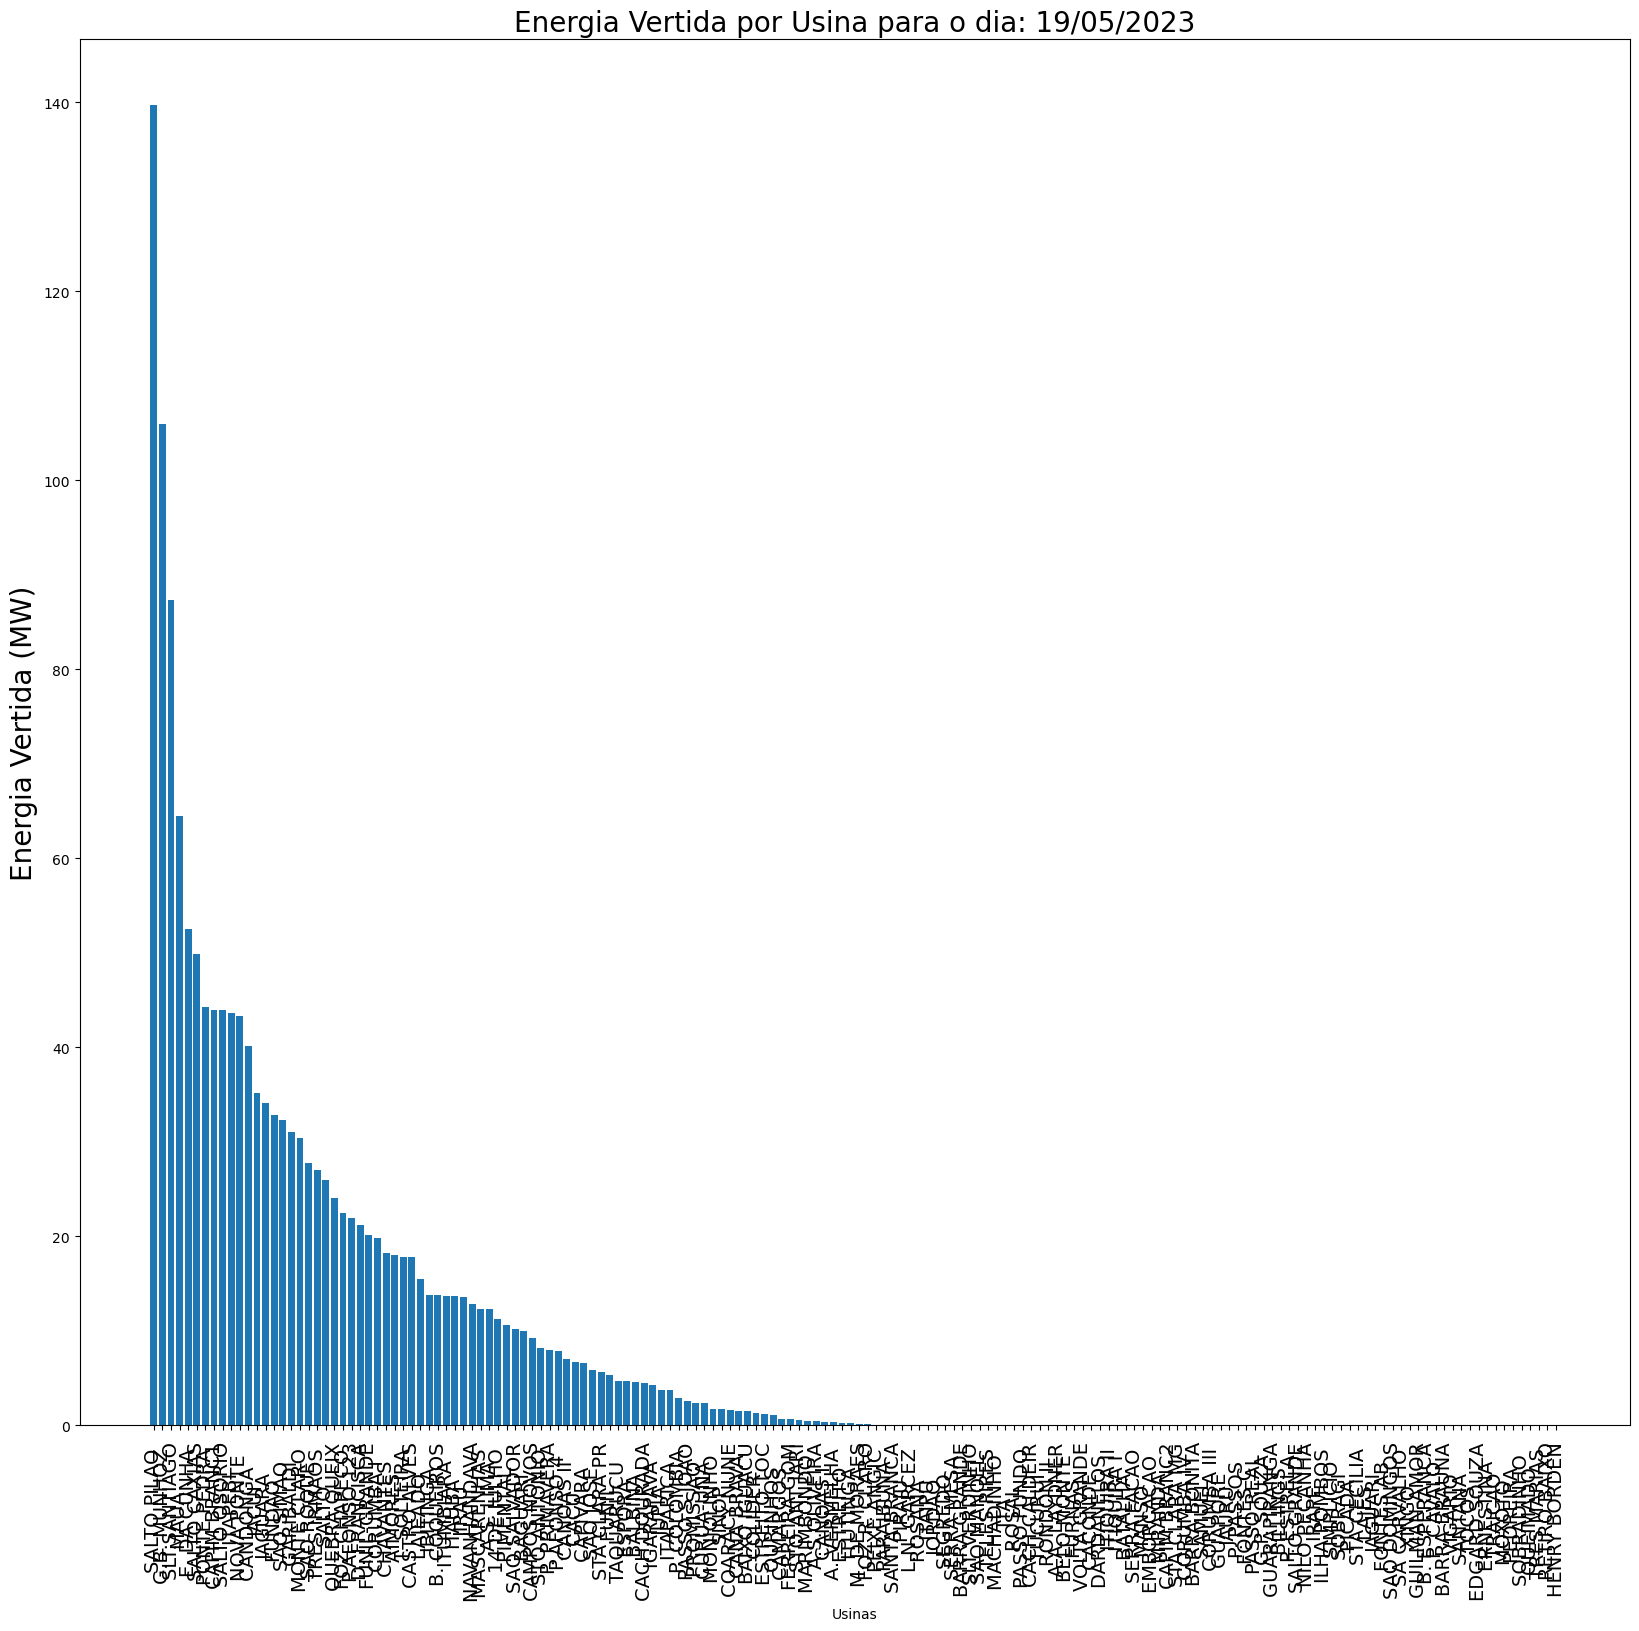

In [4]:
df = df.sort_values(by='ENERGIA VERTIDA', ascending=False)
plt.figure(figsize=(20,18))
plt.bar(df['Usina'], df['ENERGIA VERTIDA'])
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Usinas')
plt.ylabel('Energia Vertida (MW)', fontsize=20)
plt.title(f'Energia Vertida por Usina para o dia: {day1.strftime("%d/%m/%Y")}', fontsize=20)
plt.show()

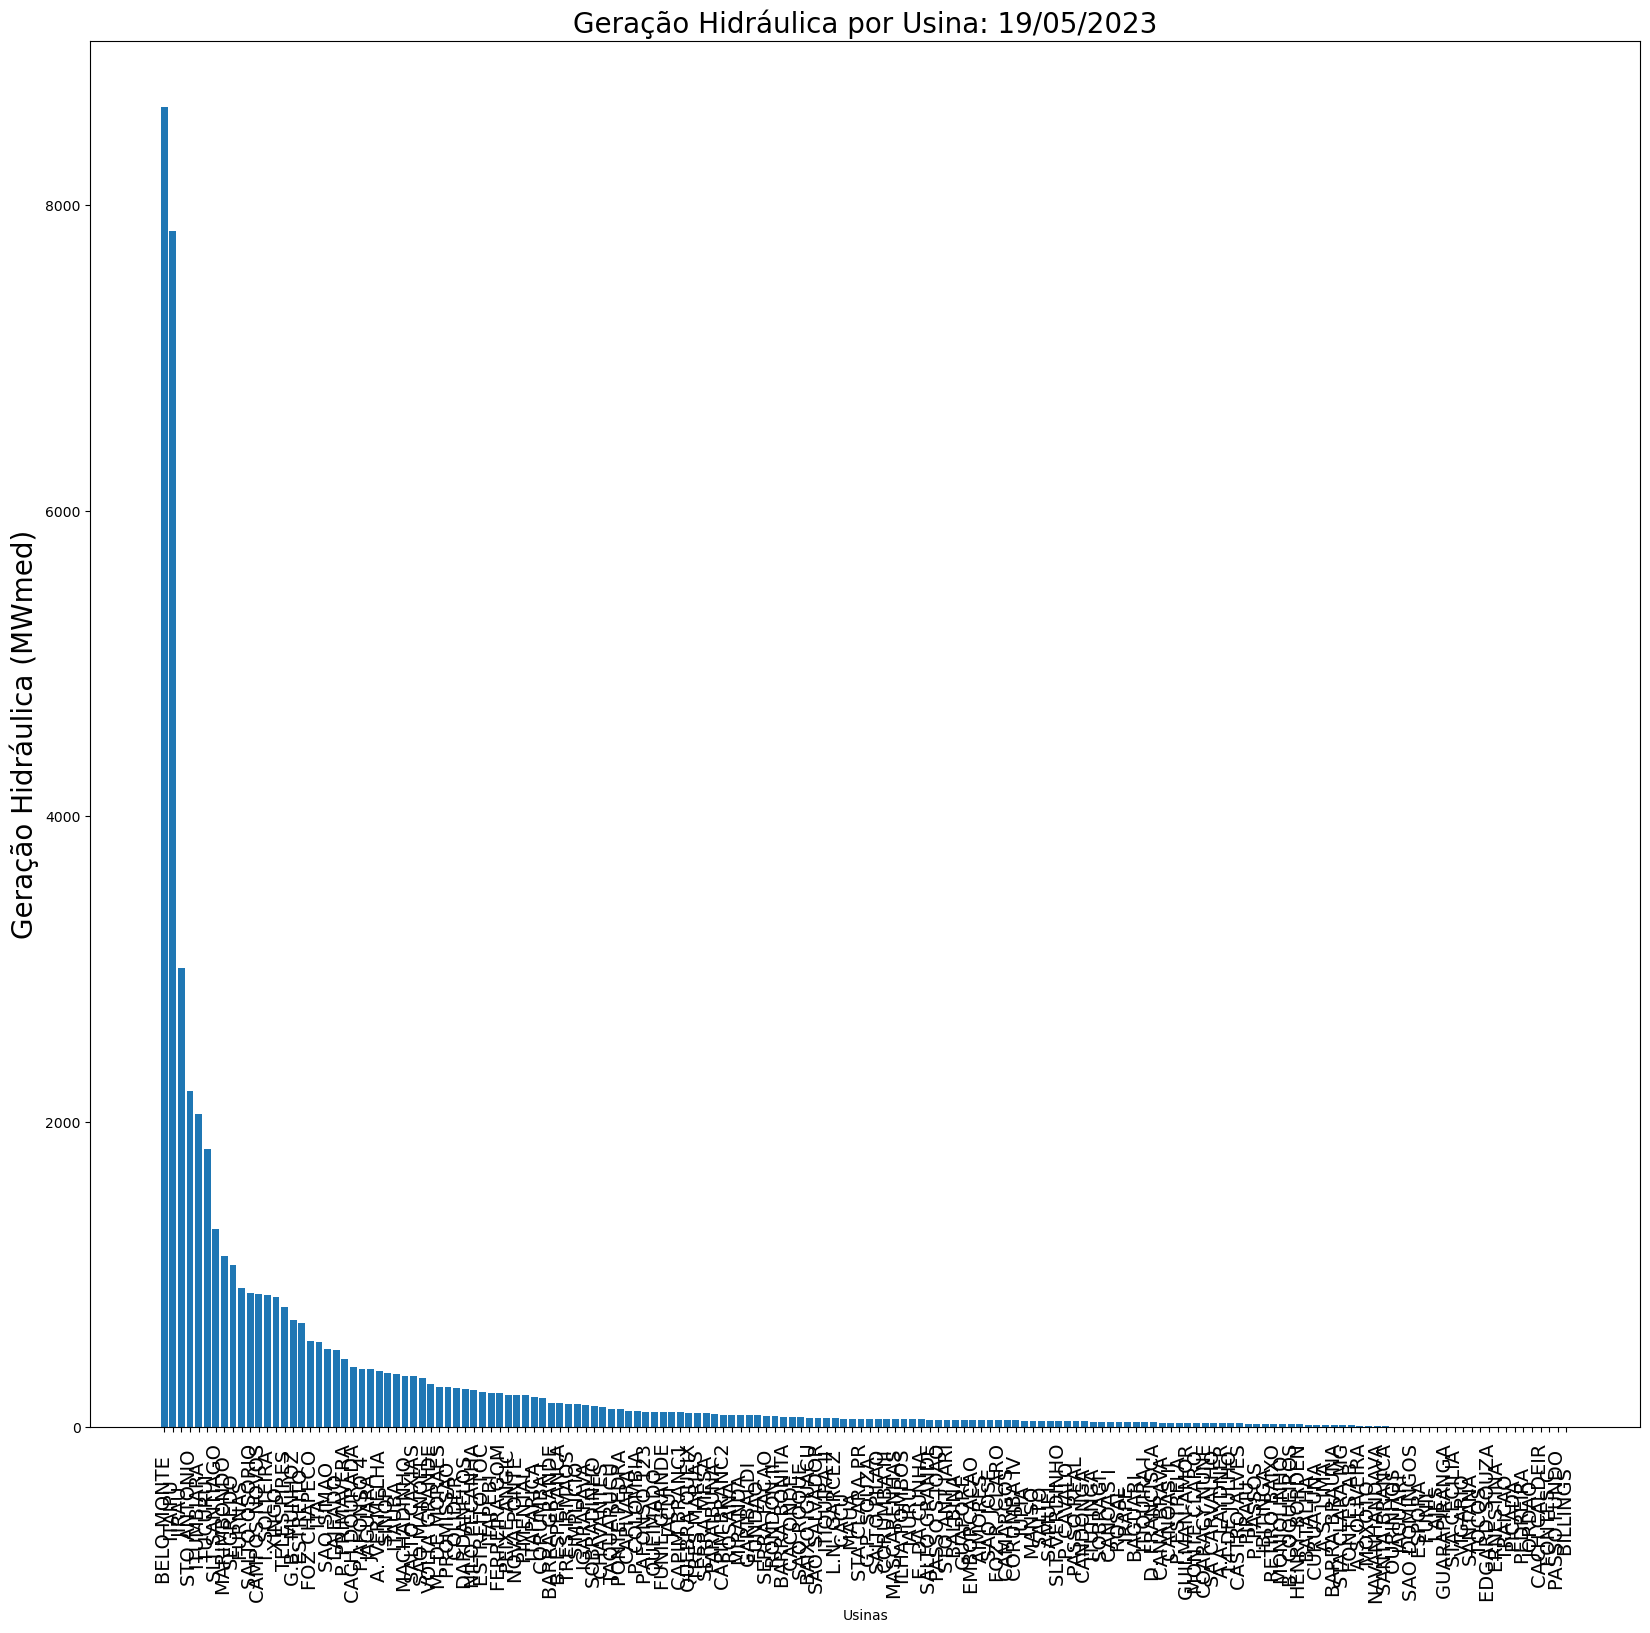

In [5]:
'''Geração Hidroelétrica - DESSEM'''
df = df.sort_values(by='Geração Hidráulica', ascending=False)
plt.figure(figsize=(20,18))
plt.bar(df['Usina'], df['Geração Hidráulica'])
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Usinas')
plt.ylabel('Geração Hidráulica (MWmed)',  fontsize=20)
plt.title(f'Geração Hidráulica por Usina: {day1.strftime("%d/%m/%Y")}', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Vazão por Usina: 19/05/2023')

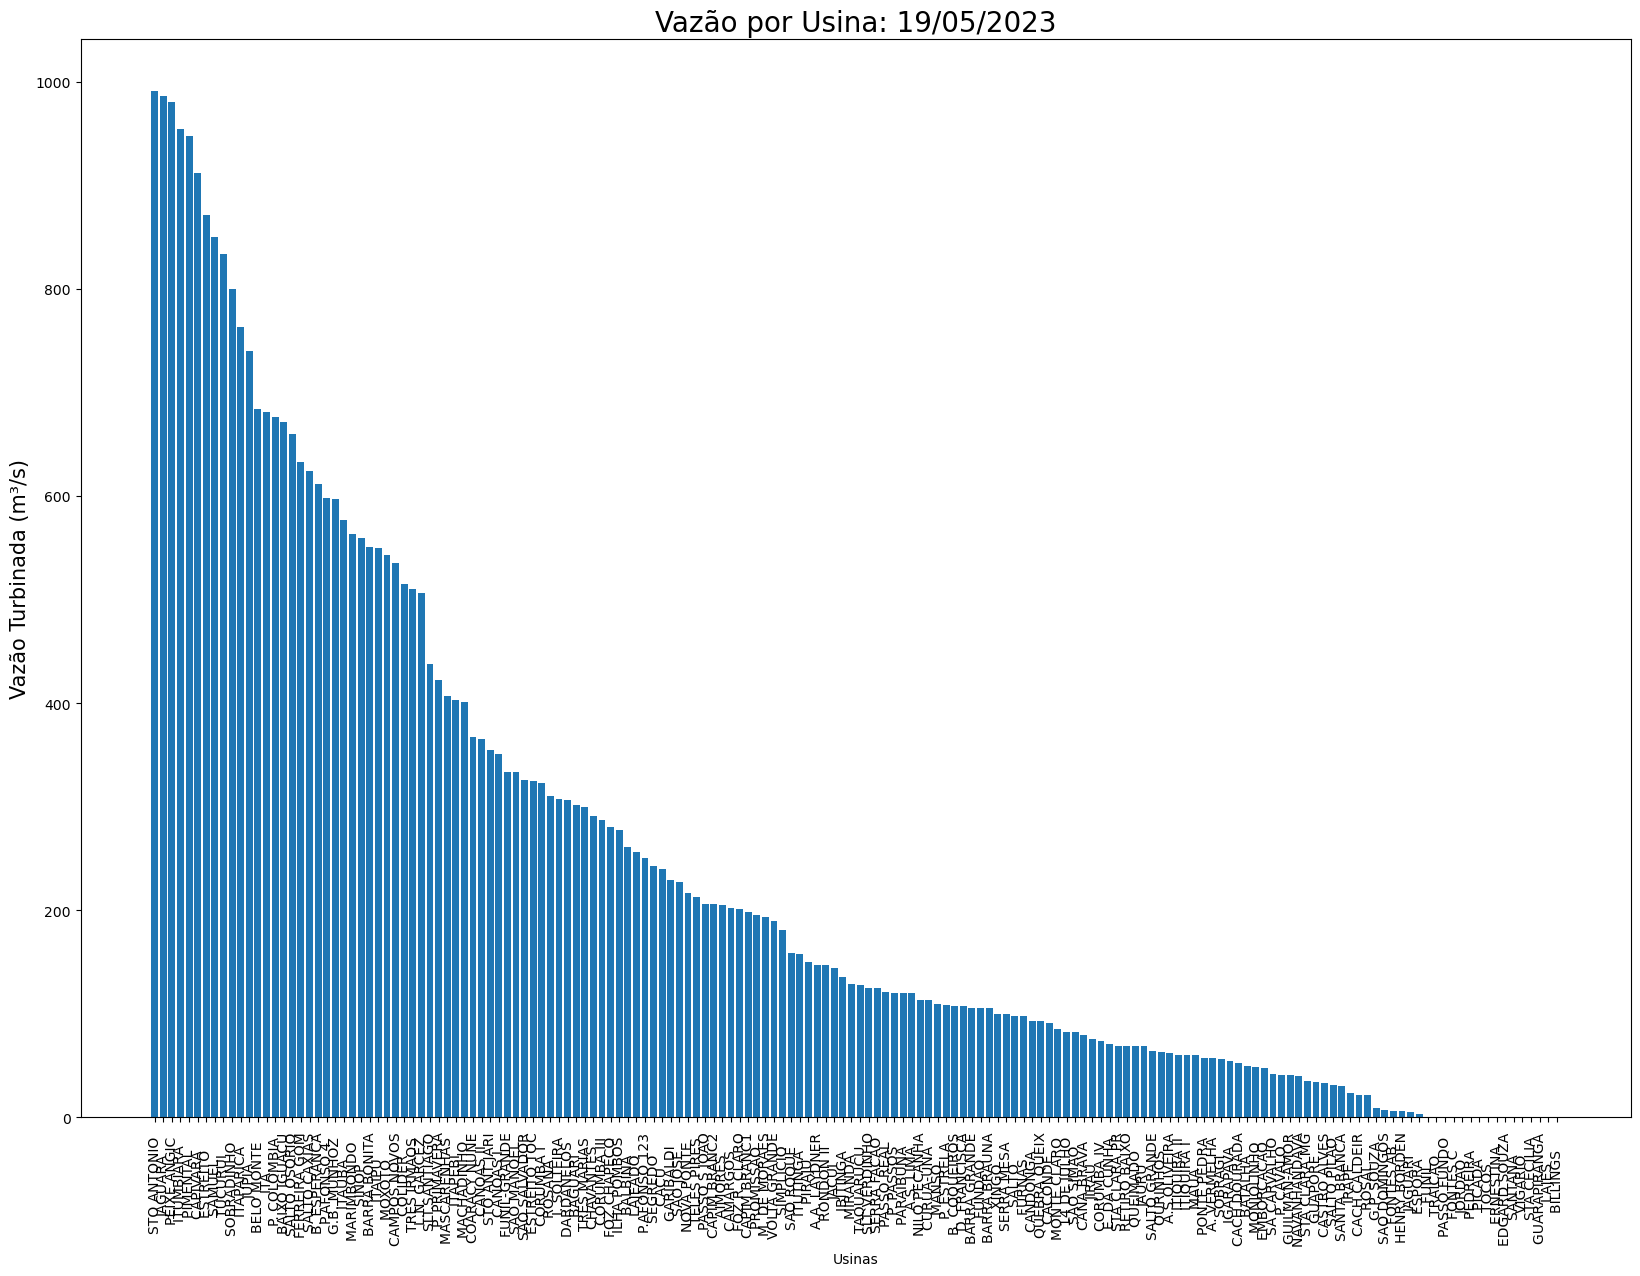

In [6]:
# Plotar o gráfico de barras
df = df.sort_values(by='Vazão Turbinada', ascending=False)
plt.figure(figsize=(20,14))
plt.bar(df['Usina'], df['Vazão Turbinada'])
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Usinas')
plt.ylabel('Vazão Turbinada (m³/s)',  fontsize=15)
plt.title(f'Vazão por Usina: {day1.strftime("%d/%m/%Y")}', fontsize=20)

154    NE
6      NE
138    NE
24     NE
162    NE
       ..
117    NE
88     NE
80     NE
87     NE
81     NE
Name: SUBMERCADO, Length: 164, dtype: object
SUBMERCADO
NE    1527.2431
Name: ENERGIA VERTIDA, dtype: float64


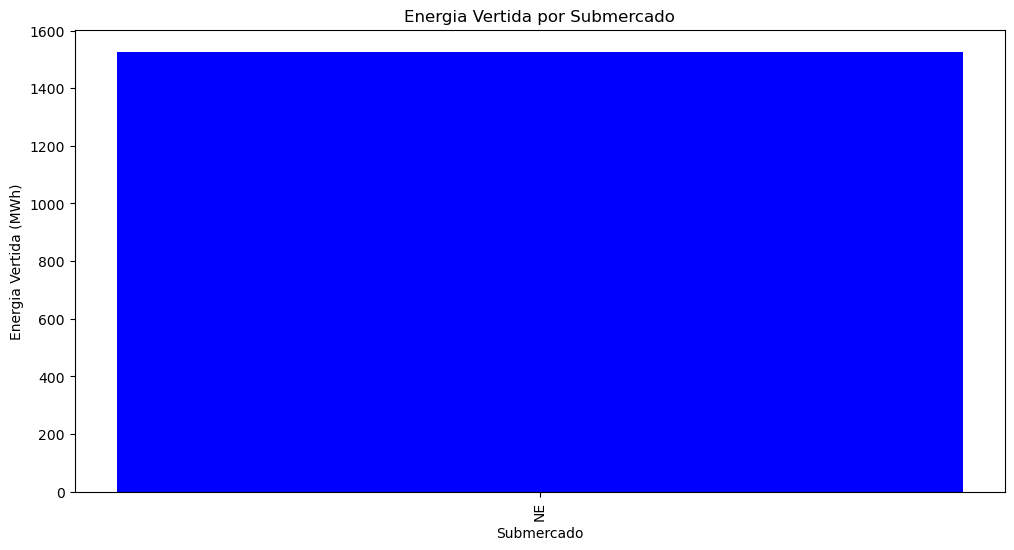

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário com as informações de submercado das usinas

# Adicionar a coluna de submercado ao DataFrame
df['SUBMERCADO'] = [usinas_submercado.get(usina, 'NE') for usina in df.index]
print(df['SUBMERCADO'])
# Agrupar os dados por submercado e somar a energia vertida
df_submercado = df.groupby('SUBMERCADO')['ENERGIA VERTIDA'].sum()
print(df_submercado)
# Ordenar o DataFrame resultante pela energia em ordem decrescente
df_submercado = df_submercado.sort_values(ascending=False)
cores = ['blue', 'green', 'red', 'orange']
# Plotar o gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(df_submercado.index, df_submercado.values, color=cores)
plt.xticks(rotation=90)
plt.xlabel('Submercado')
plt.ylabel('Energia Vertida (MWh)')
plt.title('Energia Vertida por Submercado')
plt.show()
